In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
import jupyter_core
# path = "/Users/i.oseledets/anaconda2/envs/teaching/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "sky",
              "transition": "zoom",
              "start_slideshow_at": "selected",
               "scroll": True
})


# Лекция 3. Линейные системы

## План 

- Линейные системы
- Обратная матрица
- Число обусловленности
- Метод Гаусса (Gaussian elimination)

## Линейные системы

$$ Ax = f, $$

где матрица $A$ и вектор $f$ известны.

Задача решения системы линейных уравнений – одна из основных задач вычислительной линейной алгебры.

Она возникает при решении следующих задач:

- задача линейной регрессии
- решение уравнений в частных производных и интегральных уравнений
- задачи нелинейной регрессии
- задачи оптимизации (методы Ньютона-Рафсона и Гаусса-Ньютона, условия ККТ)

## Пере- и недоопределённые линейные системы

Если система $Au = f$ имеет
- больше уравнений, чем неизвестных, она называется **переопределённой** (в общем случае не имеет решений)

- меньше уравнений, чем неизвестных, она называется **недоопределённой** (решение неединственно, нужны дополнительные предположения, чтобы гарантировать единственность решения)

## Существование решений 

Решение системы линейных уравнений с квадратной матрицей $A$

$$A u = f$$

существует тогда и только тогда, когда 
* $\det A \ne 0$

или

* матрица $A$ имеет полный ранг.

## Шкала размерностей линейных систем 

В различных приложениях размерности линейных систем могут быть различны 

- Малая: $n \leq 10^4$ (вся матрица помещается в память, **плотные матрицы**)
- Средняя: $n = 10^4 - 10^6$ (обычно **разреженные** или **структурированные** матрицы)
- Большая: $n = 10^8 - 10^9$ (обычно **разреженные** матрицы и параллельные вычисления)

## Линейные системы могут быть большими

Возьмём непрерывную задачу, дискретизуем её на сетке из $N$ элементов и получим линейную систему с матрицей $N\times N$.  
Пример сетки для самолёта Airbus A319
(подробнее см. [GMSH website](http://geuz.org/gmsh/)).  
<img src="./a319_4.png" width=50%>

Основная сложность в том, что такие системы очень большие: миллионы и миллиарды неизвестных!

## Линейные системы могут быть структурированы

- Хранение $N^2$ элементов матрицы невозможно уже для $N = 100000$.  

**Q:** как работать с такими матрицами?  

**A:** к счастью, такие матрицы чаще всего являются **структурированными** и требуют хранения $\mathcal{O}(N)$ элементов.

- Наиболее растространённый тип структурированных матриц – это разреженные матрицы: такие матрицы имеют только $\mathcal{O}(N)$ ненулевых элементов!  

- Пример (одна из самых известных матриц для $n = 5$):

$$
  \begin{pmatrix}
  2 & -1 & 0 & 0 & 0 \\
  -1 & 2 & -1 & 0 & 0 \\
  0 & -1 & 2 & -1 & 0 \\
  0 & 0 &-1& 2 & -1  \\
  0 & 0 & 0 & -1 & 2 \\
  \end{pmatrix}
$$

- По крайней мере можно хранить такие матрицы
- Также можно умножать такие матрицы на вектор быстро
- Но как решать линейные системы с такими матрицами?

## Основные вопросы о линейных системах

1. Какую точность мы можем получить от решения (из-за ошибок округления)?
2. Как мы вычислим решение? (LU разложение, метод Гаусса)
3. Какая сложность решения системы линейных уравнений?

## Как решать линейные системы?

**Важно**: забудьте о детерминантах и правиле Крамера (хотя они полезны для матриц $2 \times 2$)!

## Как решать линейные системы?

Основной инструмент – исключение переменных. 

\begin{align*}
    &2 y + 3 x = 5 \quad&\longrightarrow \quad &y = 5/2 -  3/2 x \\
    &2 x + 3z = 5 \quad&\longrightarrow\quad &z = 5/3 - 2/3 x\\
    &z + y = 2 \quad&\longrightarrow\quad  & 5/2 + 5/3 - (3/2 + 2/3) x = 2,\\
\end{align*}

и так вы можете найти $x$ (и все остальные неизвестные).  

Этот процесс называется **методов Гаусса** и является одним из самых часто используемых алгоритмов. 

## Метод Гаусса

Метод Гаусса состоит из двух этапов:
1. Проход вперёд
2. Проход назад

## Проход вперёд

- Исключим $x_1$:

$$
   x_1 = f_1 - (a_{12} x_2 + \ldots + a_{1n} x_n)/a_{11},
$$

и подставим в уравнения $2, \ldots, n$. 

- Затем исключим $x_2$ и подставим в остальные уравнения.

- Важно, что ведущий элемент (pivot), тот на который мы делим, не равен $0$.

## Проход назад

Во время прохода назад:
- решаем уравнение для $x_n$
- подставляем решение в уравнение для $x_{n-1}$ и так далее, пока не вычислим все $x_i, i=1,\ldots, n$.

## Метод Гаусса и LU разложение

Метод Гаусса связан с вычислением одного из самых важных матричных разложений: **LU разложения**.

**Определение**: LU разложение матрицы $A$ – это представление

$$A =  LU,$$

где $L$ – **нижнетреугольная** и $U$ – **верхнетреугольная** матрица.

Это разложение **неединственно**, поэтому обычно требуют дополнительно, что на диагонали матрицы $L$ стоят 1.

**Основная цель** вычисления LU разложения – это решение системы линейных уравнений, поскольку

$$
    A^{-1} f = (L U)^{-1} f = U^{-1} L^{-1} f, 
$$

и задача сводится к решению двух линейных систем с верхне- и нижнетреугольными матрицами.

Проход вперёд выражается в виде

$$
     L y = f, 
$$

аналогично для прохода назад

$$
   U x = y.
$$

Всегда ли существует $LU$ разложение?

## Сложность метода Гаусса/LU разложения

- Каждый шаг исключения занимает $\mathcal{O}(n^2)$ операций. 

- Таким образом, сложность алгоритма $\mathcal{O}(n^3)$.  

## Существование LU разложения

Алгоритм вычисления LU разложения работает,

если **мы не делим на $0$** на каждом шаге метода Гаусса.

**Q:** Для какого класса матриц это так?

**A:** Это так для **строго регулярных матриц**.

## Строго регулярные матрицы и LU разложение

**Определение.** Матрица $A$ называется *строго регулярной*, если все лидирующие главные миноры (подматрицы из первых $k$ строк и $k$ столбцов) не вырождены. 

В этом случае LU разложение всегда существует. Обратное также верно (проверьте!).

## LU разложение для положительно определённых Эрмитовых матриц (разложение Холецкого)

Строго регулярные матрицы имеют LU разложение. 

Важный класс строго регулярных матриц – это класс **Эрмитовых положительно определённых матриц**

**Определение.** Матрица $A$ называется <font color='red'> положительно определённой </font>, если для любого $x: \Vert x \Vert \ne 0$ выполнено

$$
(x, Ax) > 0.
$$
- если это выполнено для $x \in \mathbb{C}^n$, тогда матрица $A$ эрмитова
- если это выполнено для $x \in \mathbb{R}^n$, тогда матрица $A$ может быть несимметрична

**Утверждение:** Эрмитова положительно определённая матрица $A$ строго регулярна и имеет разложение Холецкого вида

$$A = RR^*,$$

где $R$ нижнетреугольная матрица.

Часто матрица $R$ называется "квадратным корнем" матрицы $A$. 

## Вычисление LU разложения

Во многих случаях достаточно один раз вычислить LU разложение!

Если такое разложение найдено (что требует $\mathcal{O}(n^3)$ операций), тогда решение линейной системы сводится к решению линейных систем с матрицами $L$ и $U$, которые требуют $\mathcal{O}(n^2)$ операций.

**Упражнение:** Решение линейной системы с треугольной матрицей вычисляется быстро. Как вычислить $L$ и $U$?

## Когда алгоритм вычисления LU разложения не работает

- Что случится, если матрица не является строго регулярной (или ведущий элемент в методе Гаусса очень мал)?   

- Классический пример матрицы $2 \times 2$ с "плохим" LU разложением:

$$
    A = \begin{pmatrix}
    \varepsilon & 1 \\
    1 & 1 
    \end{pmatrix}
$$

- Если $\varepsilon$ достаточно мал, мы можем столкнуться с неустойчивостью. В то время как вычисление разложения Холецкого всегда устойчиво.

Проверим это численно...

In [11]:
import numpy as np
eps = 1e-16#1.12e-16
a = np.array([[eps, 1],[1.0,  1]])
a0 = a.copy()
n = a.shape[0]
L = np.zeros((n, n))
U = np.zeros((n, n))
for k in range(n): #Eliminate one row   
    L[k, k] = 1
    for i in range(k+1, n):
        L[i, k] = a[i, k] / a[k, k]
        for j in range(k+1, n):
            a[i, j] = a[i, j] - L[i, k] * a[k, j]
    for j in range(k, n):
        U[k, j] = a[k, j]

print('L * U - A:\n', np.dot(L, U) - a0)
L, U

L * U - A:
 [[ 0.  0.]
 [ 0. -1.]]


(array([[1.e+00, 0.e+00],
        [1.e+16, 1.e+00]]),
 array([[ 1.e-16,  1.e+00],
        [ 0.e+00, -1.e+16]]))

## Выбор ведущего элемента (pivoting)

Мы можем переставить строки и столбцы матрицы $A$ так, чтобы элемент $A_{kk}$, на который мы делим, был максимальным.  

Простейшая, но эффективная стратегия – это выбор максимального элемента в строке: на каждом шаге выбираем элемент, который максимален по модулю и перемещаем его на диагональ.

Это даёт следующее разложение 

$$A = P L U,$$

где $P$ – это **матрица перестановки**.


- Почему это хорошая стратегия?

## Устойчивость линейных систем

- Существует фундаментальная проблема с решением систем линейных уравнений, которая не зависит от используемого алгоритма.

- Она проявляется, когда элементы матрицы представляются как числа с плавающей точкой или имеется некоторый шум в измерениях.

Проиллюстрируем эту проблему на следующем примере.

1.338446684196811


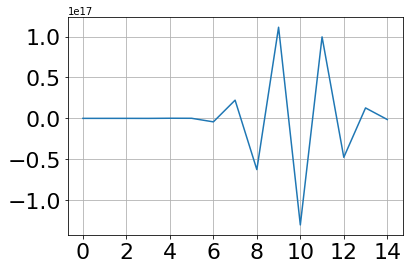

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 15
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
x = np.linalg.solve(a, rhs) #This function computes LU-factorization and solves linear system

#And check if everything is fine
er = np.linalg.norm(a.dot(x) - rhs) / np.linalg.norm(rhs)
print(er)
plt.plot(x)
plt.grid(True)
plt.xticks(fontsize=22)
_ = plt.yticks(fontsize=22)

## Линейные системы и обратная матрица

- В чём проблема в предыдущем примере? 

- Почему ошибка растёт так быстро?  

- И мы приходим к одному из главных понятий вычислительной линейной алгебры: числу обусловленности матрицы.  

Но перед этим нам нужно определить **обратную матрицу**.

## Обратная матрица: определение

Матрица, обратная к матрице $A$, это такая матрица $X$ что  

$$
   AX = XA = I, 
$$

где $I$ – единичная матрица. Обратная матрица обозначается как $A^{-1}$.

Вычисление обратной матрицы связано с решением линейной системы. В самом деле, $i$-ый столбец произведения даёт

$$
A x_i = e_i,
$$

где $e_i$ – $i$-ый столбец единичной матрицы. 
Таким образом, мы можем использовать метод Гаусса, чтобы решить эту систему.


## Обратная матрица и линейные системы

Если у нас есть обратная матрица $A^{-1}$, тогда решение линейной системы

$$Ax = f$$

выражается как $x = A^{-1} f$.  

В самом деле,  

$$   
    A(A^{-1} f) = (AA^{-1})f = I f = f.
$$

## Ряд Неймана

Для того чтобы выяснить, почему в решении была такая большая ошибка, нам потребуется важный вспомогательный результат.  

**Ряд Неймана**:  

Если матрица $F$ такая что $\Vert F \Vert < 1$, тогда матрица $(I - F)$ обратима и

$$(I - F)^{-1} = I + F + F^2 + F^3 + \ldots = \sum_{k=0}^{\infty} F^k.$$

Заметим, что это матричная версия выражения для суммы геометрической прогрессии. 

**Q**: какая норма тут используется? Какая норма "самая лучшая" в данном случае?

## Доказательство

Сначала докажем, что ряд $\sum_{k=0}^{\infty} F^k$ сходится.  

Как и в скалярном случае выполнено

$$
   (I - F) \sum_{k=0}^N F^k = (I - F^{N+1}) \rightarrow I, \quad N \to +\infty
$$

Действительно,

$$
\| (I - F^{N+1}) - I\| = \|F^{N+1}\| \leqslant \|F\|^{N+1} \to 0, \quad N\to +\infty.
$$

Также можем оценить **норму обратной матрицы**:

$$
  \left\Vert \sum_{k=0}^N F^k \right\Vert \leq \sum_{k=0}^N \Vert F \Vert^k \Vert I \Vert \leq \frac{\Vert I \Vert}{1 - \Vert F \Vert} 
$$

## Малое возмущение обратной матрицы

Используя этот результат, мы можем оценить как возмущение в элементах матрицы влияет на возмущение в элементах обратной матрицы. Предположим, что возмущение $E$ мало в том смысле, что $\Vert A^{-1} E \Vert < 1$. Тогда

$$(A + E)^{-1} = \sum_{k=0}^{\infty} (-A^{-1} E)^k A^{-1}$$

и более того, 

$$
  \frac{\Vert (A + E)^{-1} - A^{-1} \Vert}{\Vert A^{-1} \Vert} \leq \frac{\Vert A^{-1} \Vert \Vert E \Vert \Vert I \Vert}{1 - \Vert A^{-1} E \Vert}.
$$

Видно, что норма обратной матрицы входит в оценку.

## Число обусловленности линейной системы

Рассмотрим **возмущённую** линейную систему:

$$
   (A + \Delta A) \widehat{x} = f + \Delta f.
$$

## Оценки!

$$
\begin{split}
\widehat{x} - x &= (A + \Delta A)^{-1} (f + \Delta f) - A^{-1} f =\\ 
&= \left((A + \Delta A)^{-1} - A^{-1}\right)f + (A + \Delta A)^{-1} \Delta f = \\
&= \Big[\sum_{k=0}^{\infty} (-A^{-1} \Delta A)^k\Big] A^{-1} f + \Big[\sum_{k=0}^{\infty} (A^{-1} \Delta A)^k \Big] A^{-1} \Delta f,
\end{split}
$$  
поэтому
$$
\begin{split}
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq 
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A^{-1}\Delta A\|} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \leq \\
\leq
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A\|\|A^{-1}\|\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \equiv \\
\equiv &\frac{\mathrm{cond}(A)}{1 - \mathrm{cond}(A)\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big)
\end{split}
$$

Главную роль играет **число обусловленности** матрицы $A$: $\mathrm{cond}(A) = \Vert A \Vert \Vert A^{-1} \Vert$.

## Число обусловленности

- Чем больше число обусловленности, тем меньше цифр в записи числа мы можем правильно восстановить. 
- Число обусловленности разное для разных норм.
- Для спектральной нормы выполнено (проверьте!) $\mathrm{cond}_2 (A) = \|A\|_2 \|A^{-1}\|_2 = \frac{\sigma_{\max}(A)}{\sigma_{\min}(A)}$
- Заметим, что если $\Delta A = 0$, тогда

$$
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq \mathrm{cond}(A) \frac{\|\Delta f\|}{\|f\|}
$$

## И снова матрица Гильберта 

- Проверим насколько оценка точная в обоих случаях: единичная правая часть и случайная правая часть (вспомните пример с прошлой лекции!)
- Результаты существенно отличаются!

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n = 1000
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.ones(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a, 2)
print('Error:', er, 'Condition number:', cn)

Error: 2.217472233227586e-06 Condition number: 4.492167979846466e+20


Error: 19.832027222143697 Condition number: 4.073996146476839e+19


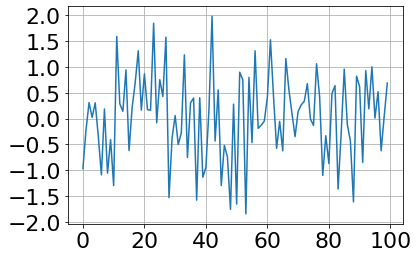

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a)
print('Error:', er, 'Condition number:', cn)

u, s, v = np.linalg.svd(a)
rhs = np.random.randn(n)
plt.plot(u.T.dot(rhs))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)

### Как это объяснить?

## Переопределённые линейные системы

- Рассмотрим переопределённые линейные системы, в которых число уравнений больше, чем число неизвестных.
- Простейший пример: аппроксимация точек на плоскости с помощью линейной модели

Стандартный способ минимизации невязки (**линейная задача наименьших квадратов**)

$$\Vert A x - b \Vert_2 \rightarrow \min$$

## Переопределённая система и матрица Грама

Условие оптимальности $0\equiv \nabla \left(\|Ax-b\|_2^2\right)$, где $\nabla$ обозначает градиент. Поэтому,

$$
0 \equiv \nabla \left(\|Ax-b\|_2^2\right) = 2(A^*A x - A^*b) = 0.
$$

Таким образом,

$$
A^* A x = A^* b
$$

Матрица $A^* A$ называется **матрицей Грама**, а система называется **нормальным уравнением**. 

- Число обусловленности матрицы $A^* A$ равно квадрату числа обусловленности матрицы $A$ (проверьте!).
- Поэтому решать нормальное уравнение в таком виде – не самая хорошая идея!

## Псевдообратная матрица

Матрица $A^* A$ может быть вырождена в общем случае (почему?).
Поэтому необходимо ввести понятие псевдообратной матрицы  $A^{\dagger}$ такой что <br>
решение линейной задачи наименьших квадратов можно было записать в виде

$$x = A^{\dagger} b.$$

Матрица 

$$
A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^*
$$ 

называется псевдообратной матрицей Мура-Пенроуза для матрицы $A$.

* Если матрица $A$ имеет полный ранг, тогда $A^* A$ невырождена, и мы получим $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^*$.

* Если матрица $A$ квадратная и невырожденная, мы получим $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^* = A^{-1} A^{-*} A^* = A^{-1}$ – обычная обратная матрица для $A$

* Если $A$ имеет линейно зависимые столбцы, тогда $A^\dagger b$ даёт решение минимальной евклидовой нормы. 

## Вычисление псевдообратной матрицы с помощью SVD

Пусть $A = U \Sigma V^*$ SVD для матрицы $A$. Тогда,

$$A^{\dagger} = V \Sigma^{\dagger} U^*,$$

где $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел матрицы $A$. Действительно,

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = \lim_{\alpha \rightarrow 0}( \alpha VV^* + V \Sigma^2 V^*)^{-1} V \Sigma U^* = \lim_{\alpha \rightarrow 0}( V(\alpha I + \Sigma^2) V^*)^{-1} V \Sigma U^* = V \lim_{\alpha \rightarrow 0}(\alpha I + \Sigma^2)^{-1} \Sigma U^* = V \Sigma^{\dagger} U^*,$$

* Вы можете проверить, что $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел <br>
* Если сингулярные числа малы, их можно не обращать. Это даст решение менее чувствительное к шуму в правой части

**Q:** что произошло с числом обусловленности?

## Стандартный способ решения линейной задачи наименьших квадратов

Использование $QR$ разложения.

Любая матрица может быть представлена в виде 

$$
A = Q R,
$$

где $Q$ – унитарная матрица, и $R$ – верхнетреугольная.

Тогда, если $A$ имеет полный ранг, тогда

$$
x = A^{\dagger}b = (A^*A)^{-1}A^*b = ((QR)^*(QR))^{-1}(QR)^*b = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b. 
$$ 

Таким образом, задача поиска оптимального $x$ эквивалентна решению следующей квадратной системы 

$$
Rx = Q^* b.
$$

Так как $R$ верхнетреугольная, решение этой системы требует $\mathcal{O}(n^2)$ операций. Также этот способ более устойчив, чем использование псевдообратной матрицы напрямую.

## Пример линейной задачи наименьших квадратов

Рассмотрим двумерный пример. Пусть дана линейная модель 

$$y = ax + b$$

и зашумлённые данные $(x_1, y_1), \dots (x_n, y_n)$. Тогда линейная система на коэффициенты будет выглядеть как 

$$
\begin{split}
a x_1 &+ b &= y_1 \\
&\vdots \\
a x_n &+ b &= y_n \\
\end{split}
$$
или в матричном виде
$$
\begin{pmatrix}
x_1 & 1 \\
\vdots & \vdots \\
x_n & 1 \\
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} =
\begin{pmatrix}
y_1 \\
\vdots  \\
y_n \\
\end{pmatrix},
$$
что является переопределённой системой

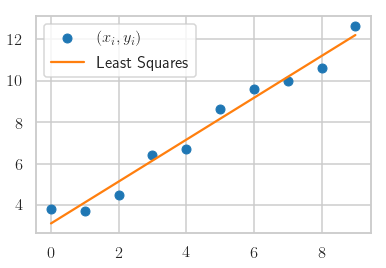

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a_exact = 1.
b_exact = 2.

n = 10
xi = np.arange(n)
yi = a_exact * xi + b_exact + 2*np.random.random(n)

A = np.array([xi, np.ones(n)])
coef = np.linalg.pinv(A).T.dot(yi) # coef is [a, b]

plt.plot(xi, yi, 'o', label='$(x_i, y_i)$')
plt.plot(xi, coef[0]*xi + coef[1], label='Least Squares')
plt.legend(loc='best')

## Главное в этой лекции

- Линейные системы можно решать методом Гаусса, сложность – $\mathcal{O}(n^3)$.
- Линейные системы можно решать с помощью LU разложения, сложность – $\mathcal{O}(n^3)$ для разложения, и  $\mathcal{O}(n^2)$ для каждой правой части
- Линейная задача наименьших квадратов может быть решена с помощью решения нормального уравнения (плохая идея!)
- Линейная задача наименьших квадратов может быть решена с помощью QR разложения (стандартный подход)